# Regression Modelling 

In this project, we will build a binomial logistic regression to make predictions for a dependent variable based on a number of independent variables. To accomplish this, we will perform a complete logistic regression analysis, which includes creating and fitting a model then evaluating model results.


**The purpose** of this project is to demostrate knowledge of exploratory data analysis (EDA) and a binomial logistic regression model.

**The goal** is to build a binomial logistic regression model and evaluate the model's performance.
<br/>

*This project has four parts:*

**Part 1:** Importing packages and loading data

**Part 2:** Exploratory Data Analysis (EDA)

**Part 3:** Building Binomial Logistic Regression Model 

**Part 4:** Evaluating Regression Model

### **Task 1. Imports and data loading**
Import relevant packages

In [270]:
# import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics 
from sklearn.metrics import classification_report

#### Load the dataset

In [272]:
# load the data
waze_df = pd.read_csv(r'C:\Users\Ghost\Desktop\project_files\waze_dataset.csv')

#### **Data overview and summary statistics**

Use the following methods and attributes on the dataframe:

* `head()`
* `shape`
* `describe()`
* `info()`

It's always helpful to have this information at the beginning of a project, where we can always refer back to if needed.

In [273]:
waze_df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


In [274]:
waze_df.shape

(14999, 13)

Generate summary statistics using the `describe()` method.

In [275]:
waze_df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


Check summary information using the `info()` method.

In [276]:
waze_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


### Task 2. Data exploration and cleaning

   Remove irrelevant columns, check for missing data, duplicates and outliers and handle them accordingly


In [277]:
# drop id column
waze_df = waze_df.drop('ID', axis = 1)
waze_df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


Check for number of duplicates using the `duplicated()` method

In [278]:
# check duplicates
waze_df.duplicated().sum()

0

Check for missing data

In [279]:
waze_df.isna().sum()

label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

Only `label` column has missing values, totalling 700 rows. 

`label` is the outcome variable for our regression model, so it is important to handle missing values to avoid skewed results.

use the `dropna()` method to remove missing rows

In [280]:
# drop missing values
waze_df = waze_df.dropna(axis = 0)

# confirm changes
waze_df.isna().sum()

label                      0
sessions                   0
drives                     0
total_sessions             0
n_days_after_onboarding    0
total_navigations_fav1     0
total_navigations_fav2     0
driven_km_drives           0
duration_minutes_drives    0
activity_days              0
driving_days               0
device                     0
dtype: int64

Use Box Plots to check attributes for outliers

#### **`sessions`**

_The number of occurrence of a user opening the app during the month_

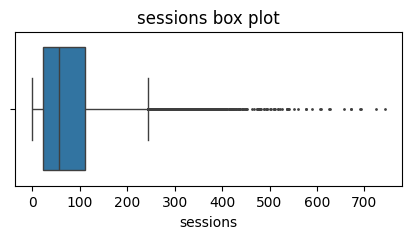

In [281]:
# Box plot
plt.figure(figsize = (5,2))
sns.boxplot(x =waze_df['sessions'], fliersize = 1)
plt.title('sessions box plot')
plt.xlabel('sessions')
plt.show()

#### **`drives`**

_An occurrence of driving at least 1 km during the month_

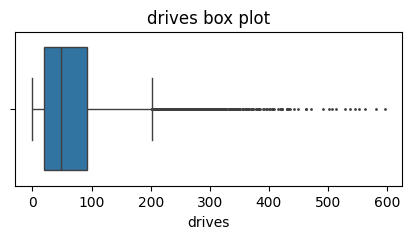

In [47]:
# Box plot
plt.figure(figsize = (5,2))
sns.boxplot(x =waze_df['drives'], fliersize = 1)
plt.title('drives box plot')
plt.xlabel('drives')
plt.show()

As we perform EDA, we find that many tasks get repeated, such as plotting Box plots of features. It's worth considering whether a function would help make our work more efficient. Sometimes it's not worth it. Other times, defining a function will help a lot.

The following code block defines a function that helps us build box plots with a particular style/format using this particular dataset.

In [282]:
# define boxplot function
def boxplot(column_name):
    plt.figure(figsize = (5,2))
    sns.boxplot(x = waze_df[column_name], fliersize = 1)
    plt.title(column_name +  ' box plot')
    plt.show()

#### **`total_sessions`**

_A model estimate of the total number of sessions since a user has onboarded_

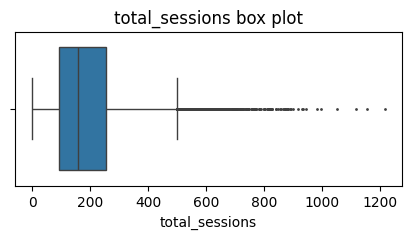

In [283]:
# Box plot
boxplot('total_sessions')

#### **`n_days_after_onboarding`**

_The number of days since a user signed up for the app_

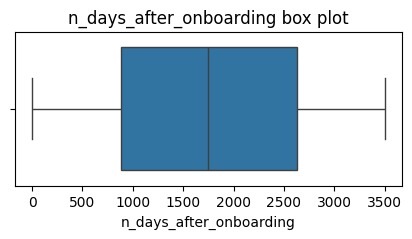

In [227]:
# Box plot
boxplot('n_days_after_onboarding')

#### **`driven_km_drives`**

_Total kilometers driven during the month_

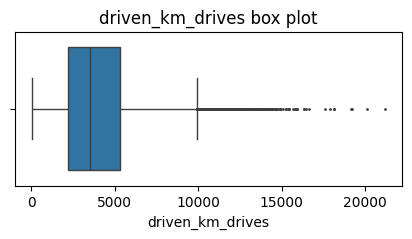

In [228]:
# Box plot
boxplot('driven_km_drives')

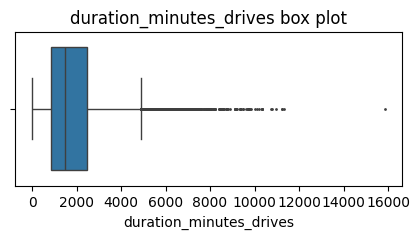

In [50]:
# Box plot
boxplot('duration_minutes_drives')

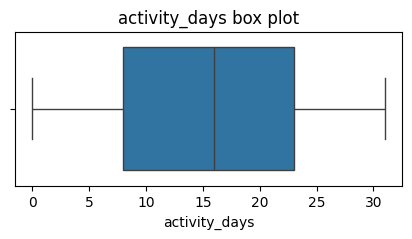

In [51]:
boxplot('activity_days')

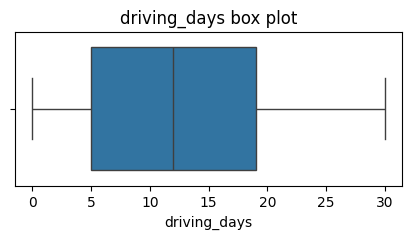

In [52]:
boxplot('driving_days')

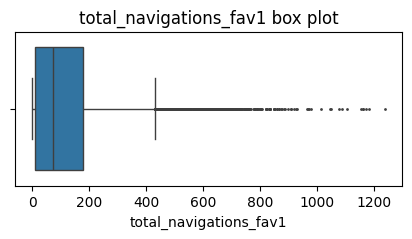

In [55]:
boxplot('total_navigations_fav1')

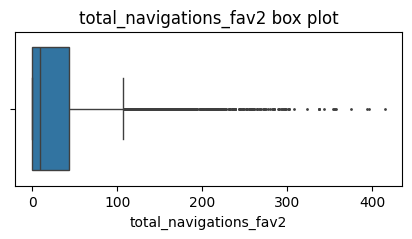

In [56]:
boxplot('total_navigations_fav2')

From our box plots we can confirm that only three variables from our dataset are without outliers, `n_days_after_onboarding`, `activity_days`, and `driving_days`.

we also determined that seven of the variables clearly contained outliers:

* `sessions`
* `drives`
* `total_sessions`
* `total_navigations_fav1`
* `total_navigations_fav2`
* `driven_km_drives`
* `duration_minutes_drives`


We rarely want to drop outliers, and generally will not do so unless there is a clear reason for it (e.g., typographic errors)

For this analysis, we will replace the outlying values for these columns by calculating the **95th percentile** of each column and changing to this value any value in the column that exceeds it.


In [284]:
# define function that replaces outliers with a column's 95th percentile value

def outlier_handler(column_name):
    # set our limit value
    limit = waze_df[column_name].quantile(0.95)

    # update values greater than outlier with 95th percentile
    waze_df.loc[waze_df[column_name] > limit, column_name] = limit

Use a for loop to apply the function to all the variables with outliers

In [285]:
# apply function to all variables with outliers 

for i in ['sessions', 'drives', 'total_sessions', 'total_navigations_fav1', 
          'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives']:
    outlier_handler(i)

# confirm changes 
waze_df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,76.539688,63.964683,183.717304,1751.822505,114.562767,27.187216,3944.558631,1792.911210,15.544653,12.182530
std,67.243178,55.127927,118.720520,1008.663834,124.378550,36.715302,2218.358258,1224.329759,9.016088,7.833835
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,243.000000,200.000000,455.439492,3500.000000,422.000000,124.000000,8898.716275,4668.180092,31.000000,30.000000


Now, check the class balance of the dependent (target) variable, `label`.

In [286]:
# check class balance
round(waze_df['label'].value_counts(normalize = True) * 100, 2)

label
retained    82.26
churned     17.74
Name: proportion, dtype: float64

82.26% of the data accounts for retained customers, with churned customers making up the remaining 17.74%.

The class balance for our label column is unsatisfactory, but for the purpose of this project we will proceed with it as is.

#### **Create features**

Create features that may be of interest to the stakeholder and/or that are needed to address the business scenario/problem.

#### **`km_per_driving_day`**

Create a new column called `km_per_driving_day`, which represents the mean distance driven per driving day for each user.

In [287]:
# create `km_per_driving_day` column
waze_df['km_per_driving_day'] = waze_df['driven_km_drives'] / waze_df['driving_days']

waze_df['km_per_driving_day'].describe()

count    1.429900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.675616e+02
50%      3.237524e+02
75%      7.415597e+02
max               inf
Name: km_per_driving_day, dtype: float64

Note that some values are infinite. This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

Convert these values from infinity to zero

In [294]:
# convert infinite values to zero
waze_df['km_per_driving_day'] = waze_df['km_per_driving_day'].replace(np.inf, 0)

# confirm changes
waze_df['km_per_driving_day'].describe()

count    14299.000000
mean       567.010426
std        970.136935
min          0.000000
25%        136.168003
50%        273.301012
75%        543.473676
max       8898.716275
Name: km_per_driving_day, dtype: float64

#### **`professional_driver`**

Create a new, binary feature called `professional_driver` that is a 1 for users who had 60 or more drives <u>**and**</u> drove on 15+ days in the last month.

**Note:** The objective is to create a new feature that separates professional drivers from other drivers. In this scenario, domain knowledge and intuition are used to determine these deciding thresholds, but ultimately they are arbitrary.

Use the `np.where()` function to create this new column

In [289]:
# Create `professional_driver` column
waze_df['professional_driver'] = np.where((waze_df['drives'] >= 60) & (waze_df['driving_days'] >= 15), 1, 0)

Perform a quick inspection of the new variable.

- Check the count of professional drivers and non-professionals

- Within each class (professional and non-professional) calculate the churn rate

In [295]:
# check count of professionals and non-professionals
waze_df['professional_driver'].value_counts()

professional_driver
0    11811
1     2488
Name: count, dtype: int64

In [296]:
# check in-class churn rate
round(waze_df.groupby('professional_driver')['label'].value_counts(normalize = True) * 100, 2)

professional_driver  label   
0                    retained    80.12
                     churned     19.88
1                    retained    92.44
                     churned      7.56
Name: proportion, dtype: float64

The churn rate for professional drivers is 7.56%, while the churn rate for non-professionals is 19.88%. This shows the churn rate for non-professional drivers were more than twice that of professional drivers.

This seems like it could add predictive signal to the model.

#### **Preparing variables**

##### **Encode categorical variables**

Change the data type of the `label` column to be binary. This change is needed to train a logistic regression model.

Assign a `0` for all `retained` users and a `1` for all `churned` users.

Save this variable as `label2` as to not overwrite the original `label` variable.

**Note:** There are many ways to do this. We will use `np.where()` as we did earlier in this notebook.

In [293]:
# create binary `label2` column
waze_df['label2'] = np.where(waze_df['label'] == 'retained', 0, 1)

waze_df[['label', 'label2']].tail(10)

,label,label2
14988,churned,1
14989,retained,0
14990,churned,1
14991,churned,1
14992,retained,0
14994,retained,0
14995,retained,0
14996,retained,0
14997,churned,1
14998,retained,0


Repeat the process above for the `device` column

In [291]:
# create new `device2` variable
waze_df['device2'] = np.where(waze_df['device'] == 'Android', 0, 1)

waze_df[['device', 'device2']].tail(10)

,device,device2
14988,Android,0
14989,iPhone,1
14990,Android,0
14991,iPhone,1
14992,iPhone,1
14994,iPhone,1
14995,Android,0
14996,iPhone,1
14997,iPhone,1
14998,iPhone,1


#### **Determine whether assumptions have been met**

The following are the assumptions for logistic regression:

* Independent observations (This refers to how the data was collected.)

* No extreme outliers

* Little to no multicollinearity among X predictors

* Linear relationship between X and the **logit** of y

For the first assumption, we can assume that observations are independent for this project.

The second assumption has already been addressed when we replaced outliers with the value of the 95th percentile.

The last assumption will be verified after modeling.


#### **Collinearity**

Check the correlation among predictor variables. First, generate a correlation matrix.

In [298]:
# generate a correlation matrix
waze_df.corr(numeric_only = True, method = 'pearson')

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,km_per_driving_day,professional_driver,label2,device2
sessions,1.000000,0.996942,0.597189,0.007101,0.001858,0.008536,0.002996,-0.004545,0.025113,0.020294,-0.012540,0.443654,0.034911,0.012704
drives,0.996942,1.000000,0.595285,0.006940,0.001058,0.009505,0.003445,-0.003889,0.024357,0.019608,-0.011929,0.444425,0.035865,0.011684
total_sessions,0.597189,0.595285,1.000000,0.006596,0.000187,0.010371,0.001016,-0.000338,0.015755,0.012953,-0.015717,0.254433,0.024568,0.012138
n_days_after_onboarding,0.007101,0.006940,0.006596,1.000000,-0.002450,-0.004968,-0.004652,-0.010167,-0.009418,-0.007321,0.011043,0.003770,-0.129263,-0.011299
total_navigations_fav1,0.001858,0.001058,0.000187,-0.002450,1.000000,0.002866,-0.007368,0.005646,0.010902,0.010419,0.000246,-0.000224,0.052322,-0.001316
total_navigations_fav2,0.008536,0.009505,0.010371,-0.004968,0.002866,1.000000,0.003559,-0.003009,-0.004425,0.002000,0.004993,0.007126,0.015032,-0.000275
driven_km_drives,0.002996,0.003445,0.001016,-0.004652,-0.007368,0.003559,1.000000,0.690515,-0.007441,-0.009549,0.334646,-0.000904,0.019767,-0.002091
duration_minutes_drives,-0.004545,-0.003889,-0.000338,-0.010167,0.005646,-0.003009,0.690515,1.000000,-0.007895,-0.009425,0.233281,-0.012128,0.040407,-0.007709
activity_days,0.025113,0.024357,0.015755,-0.009418,0.010902,-0.004425,-0.007441,-0.007895,1.000000,0.947687,-0.414868,0.453825,-0.303851,-0.010221
driving_days,0.020294,0.019608,0.012953,-0.007321,0.010419,0.002000,-0.009549,-0.009425,0.947687,1.000000,-0.424977,0.469776,-0.294259,-0.003859


Now, plot a correlation heatmap.

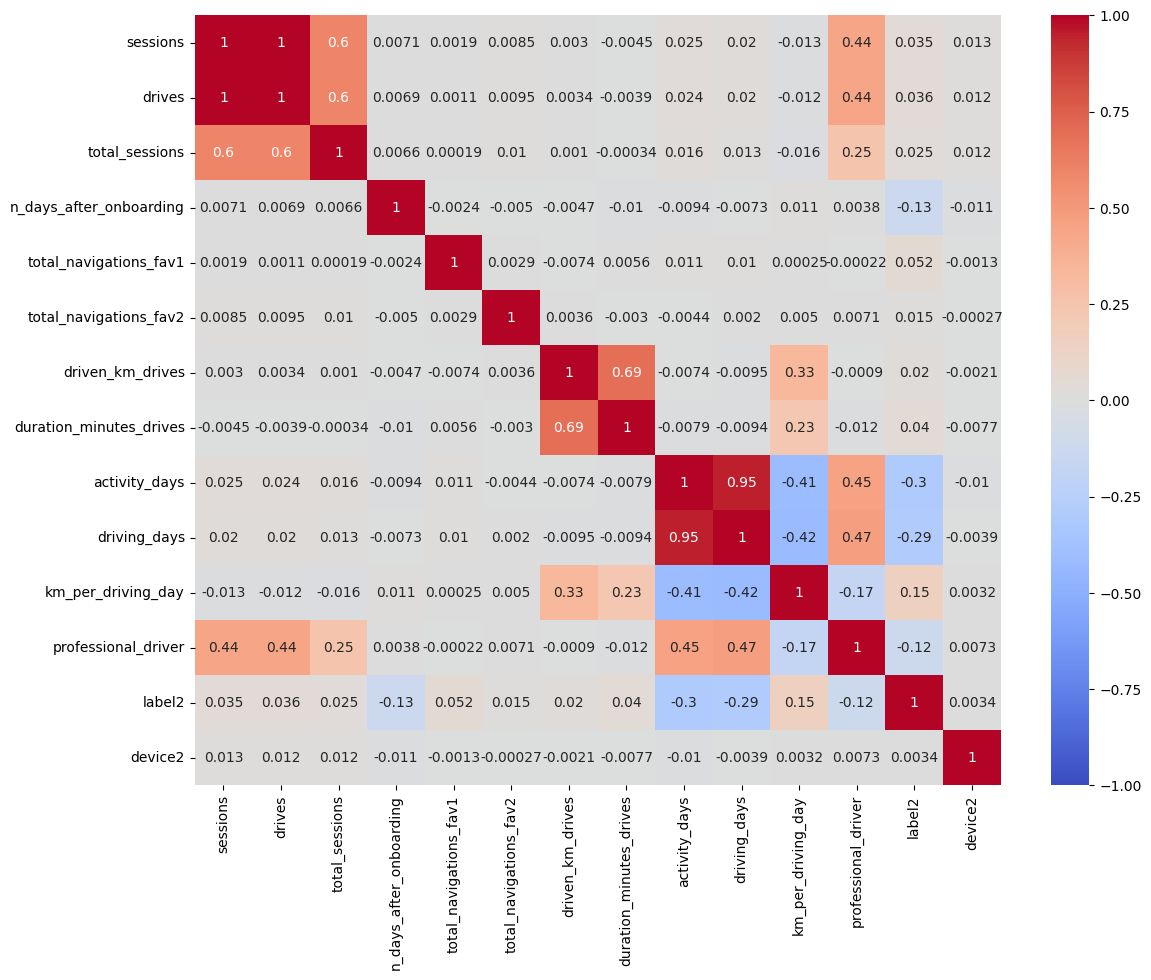

In [299]:
# plot correlation heatmap
plt.figure(figsize = (13, 10))
sns.heatmap(waze_df.corr(numeric_only = True, method='pearson'), vmin=-1, vmax=1, annot=True, cmap='coolwarm')
plt.show()

If there are predictor variables that have a Pearson correlation coefficient value greater than the **absolute value of 0.7**, these variables are strongly multicollinear. Therefore, only one of these variables should be used in our model.

**Note:** 0.7 is an arbitrary threshold. Some industries may use 0.6, 0.8, etc.

The pairs, (sessions & drives) and (driving_days & activity_days) seem to have a high correlation with each other. one from each pair will have to be dropped when selecting our predictor variables.

### **Task 3 Model building**

#### **Assign predictor variables and target**

To build our model we need to determine what x variables we want to include in our model to predict our target `label2`.

Drop the following variables and assign the results to `x`:

* `label` (this is the target)
* `label2` (this is the target)
* `device` (this is the non-binary-encoded categorical variable)
* `sessions` (this had high multicollinearity)
* `driving_days` (this had high multicollinearity)

**Note:** Notice that `sessions` and `driving_days` were selected to be dropped, rather than `drives` and `activity_days`. The reason for this is that the features that were kept for modeling had slightly stronger correlations with the target variable than the features that were dropped.

In [329]:
# isolate predictor variables
x = waze_df.drop(columns = ['label', 'label2', 'device', 'sessions', 'driving_days'], axis = 1)

Now, isolate the dependent (target) variable. Assign it to a variable called `y`.

In [330]:
# isolate target variable
y = waze_df['label2']

#### **Split the data**

Use scikit-learn's `train_test_split()` function to split our data.

**Note:** Because the target class is imbalanced (82% retained vs. 18% churned), we want to make sure that we don't get an unlucky split that over- or under-represents the frequency of the minority class. 

Set the function's `stratify` parameter to `y` to ensure that the minority class appears in both train and test sets in the same proportion that it does in the overall dataset.

In [331]:
# perform the train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 42)

Use scikit-learn to instantiate a logistic regression model. Add the argument `penalty = None`.

It is important to add `penalty = None` since our predictors are unscaled.

Fit the model on `X_train` and `y_train`.

In [332]:
# fit the model
clf = LogisticRegression(penalty = None, max_iter = 400).fit(x_train, y_train)

Call the `.coef_` attribute on the model to get the coefficients of each variable.  The coefficients are in order of how the variables are listed in the dataset.  The coefficients represent the change in the **log odds** of the target variable for **every one unit increase in x**.

If we want, create a series whose index is the column names and whose values are the coefficients in `model.coef_`.

In [333]:
pd.Series(clf.coef_[0], index=x.columns)

drives                     0.001932
total_sessions             0.000358
n_days_after_onboarding   -0.000401
total_navigations_fav1     0.001249
total_navigations_fav2     0.000989
driven_km_drives          -0.000012
duration_minutes_drives    0.000110
activity_days             -0.105191
km_per_driving_day         0.000017
professional_driver       -0.008317
device2                    0.019564
dtype: float64

Call the model's `intercept_` attribute to get the intercept of the model.

In [334]:
clf.intercept_

array([-0.05732349])

#### **Check final assumption**

Verify the linear relationship between x and the estimated log odds (known as logits) by making a regplot.

Call the model's `predict_proba()` method to generate the probability of response for each sample in the training data. (The training data is the argument to the method.) Assign the result to a variable called `training_probabilities`. This results in a 2-D array where each row represents a user in `x_train`. The first column is the probability of the user not churning, and the second column is the probability of the user churning.

In [335]:
# get the predicted probabilities of the training data
training_probabilities = clf.predict_proba(x_train)
training_probabilities

array([[0.93720539, 0.06279461],
       [0.62345891, 0.37654109],
       [0.76566324, 0.23433676],
       ...,
       [0.91768319, 0.08231681],
       [0.84853465, 0.15146535],
       [0.93314835, 0.06685165]])

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where _p_ is the probability of response:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

1. Create a dataframe called `logit_data` that is a copy of `waze_df`.

2. Create a new column called `logit` in the `logit_data` dataframe. The data in this column should represent the logit for each user.

In [336]:
#copy the `x_train` dataframe and assign to `logit_data`
logit_data = x_train

#create a new `logit` column in the `logit_data` dataframe
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

Plot a regplot where the x-axis represents an independent variable and the y-axis represents the log-odds of the predicted probabilities.

In an exhaustive analysis, this would be plotted for each continuous or discrete predictor variable. Here we show only `driving_days`.

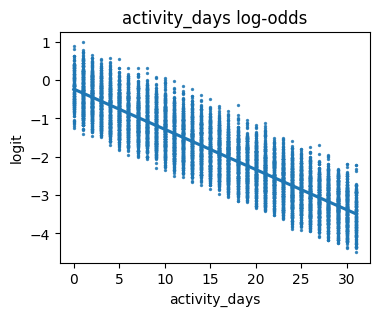

In [337]:
# plot regplot of `activity_days` log-odds
plt.figure(figsize = (4,3))
sns.regplot( y = logit_data['logit'],  x = logit_data['activity_days'], scatter_kws = {'s':2})
plt.title('activity_days log-odds')
plt.show()

### **Task 4. Results and evaluation**

Since the logistic assumptions have been met, the model results can be appropriately interpreted.

In [342]:
# generate predictions on X_test
y_pred = clf.predict(x_test)

#### **Show results with a confusion matrix**

Use the `confusion_matrix` function to obtain a confusion matrix. Use `y_test` and `y_preds` as arguments.

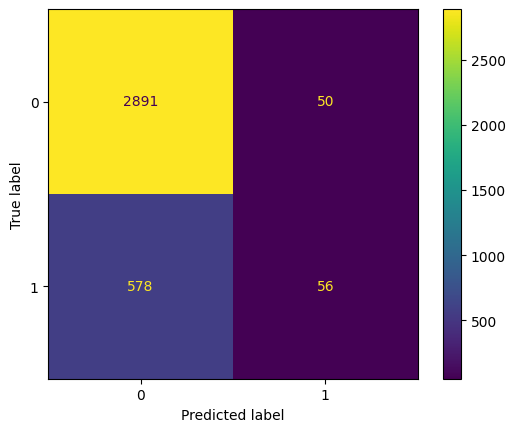

In [343]:
cm = metrics.confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()
plt.show()

display our model's accuracy, precision, recall and f1

In [344]:
# print out our evaluation parameters

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)

print(f' Accuracy: {accuracy}')
print(f' Precision: {precision}')
print(f' Recall: {recall}')
print(f' F1: {f1}')

 Accuracy: 0.8243356643356643
 Precision: 0.5283018867924528
 Recall: 0.08832807570977919
 F1: 0.15135135135135136


Use scikit-learn's `classification_report()` function to generate a table from `y_test` and `y_preds`.

In [345]:
# create a classification report
target_labels = ['retained', 'churned']
print(metrics.classification_report(y_test, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    retained       0.83      0.98      0.90      2941
     churned       0.53      0.09      0.15       634

    accuracy                           0.82      3575
   macro avg       0.68      0.54      0.53      3575
weighted avg       0.78      0.82      0.77      3575



#### **Review**
Now that we've built our regression model, the next step is to share a few of our finding:

 - The model was very accurate and above average in precision but very low recall, which means that it makes a lot of false negative predictions and fails to capture users who will churn.

 - The model's low recall means it is even more important to understand the use cases for the model. If the model is used for only basic exploratory purposes then it may have some value. Using it to make important business decisions would be ill advised due to it's weak predictions, as the evaluation metrices clearly shows.

 - It would be worth trying to improve model performance by engineering new features to generate better predictions.

 - We could also try to scale the predictor variables, and/or to reconstruct the model with different combinations of predictor variables to reduce noise from unpredictive features.

 - It would be helpful to have drive-level information for each user (such as drive times, geographic locations, etc.). It would probably also be helpful to have more granular data to know how users interact with the app. For example, how often do they report or confirm road hazard alerts?